<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

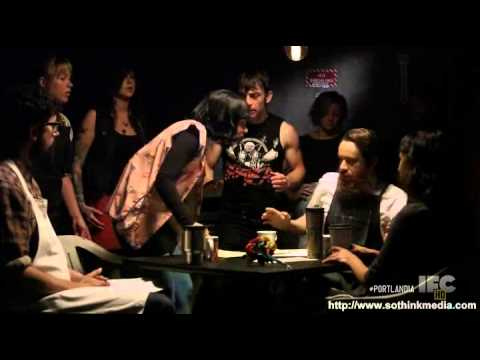

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'G:\\Data\\Lambda\\Data_Science_Course\\Unit4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

# Import Data

In [108]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [109]:
shops_master = shops

# Data Cleaning

In [116]:
shops = shops_master

In [117]:
# To seperate the rating from the rest of the text.
a = shops.star_rating.str.split(n=1, expand=True)
a.head()
# Take the column with just the numbers and turn it into a numeric
# column
b = pd.to_numeric(a[0])

In [118]:
# Add the numeric rating column and drop the "star_ratings" column
shops = shops.join(b)
shops = shops.rename(columns={0:'rating'})
shops = shops.drop(["star_rating"],1)

In [119]:
# Make lowercase, spit into a list , get rid of date
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower().split()[1:])
shops.head()

,coffee_shop_name,full_review_text,rating
0,The Factory - Cafe With a Soul,"[1, check-in, love, love, loved, the, atmosphe...",5.0
1,The Factory - Cafe With a Soul,"[listed, in, date, night:, austin,, ambiance, ...",4.0
2,The Factory - Cafe With a Soul,"[1, check-in, listed, in, brunch, spots, i, lo...",4.0
3,The Factory - Cafe With a Soul,"[very, cool, decor!, good, drinks, nice, seati...",2.0
4,The Factory - Cafe With a Soul,"[1, check-in, they, are, located, within, the,...",4.0


In [132]:
# Splitting the shops by good and bad
good_shops = shops[shops['rating'] > 3]
bad_shops = shops[shops['rating'] < 4]

print(f'Number of good shops {good_shops.shape[0]}')
print(f'Number of bad shops {bad_shops.shape[0]}\n')
print(f'6140 + 1476 = {6140+1476}')
print(f'Total shops:{shops.shape[0]}')

Number of good shops 6140
Number of bad shops 1476

6140 + 1476 = 7616
Total shops:7616


# Functions 

In [136]:
# Function to count the word frequency of one column of a dataframe
# with tokenized words
from collections import Counter

def count(tokenized_series):
    """
    Input: 
    pandas series with list of tokens.
    
    Output:
    pandas dataframe with word count details
    
    """
    
    word_counts = Counter()
    appears_in = Counter()
    
    total_tokens = len(tokenized_series)
    
    for entry in tokenized_series:
        word_counts.update(entry)
        appears_in.update(set(entry))
    
    temp = zip(word_counts.keys(),word_counts.values())
    
    wc = pd.DataFrame(temp,columns = ['word','count'])
    
    wc['rank'] = wc['count'].rank(method='first',ascending=False)

    total = wc['count'].sum()    
    wc['pct_total'] = wc['count'].apply(lambda x: x/total)
    
    wc = wc.sort_values(by='rank')
    
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns= ['word','appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x/total_tokens)
    
    return wc.sort_values(by= 'rank')
    

In [147]:
# Function to create plots of the word frequency

import squarify
import matplotlib.pyplot as plt

#the dataframe has to be in "word count" format

def square_viz(df, number):
    """ Function to display a visual of the frequency of words 
    occuring in a dataset. 
    
    Input:
    A dataframe in the word count format.
    The number of entries you want the visual to contain.
    
    Returns: 
    Nothing is returned when this function is called
    
    Output:
    Square graph similar to a word cloud. Area represents occurence 
    frequency"""
    df = df.head(number)
    squarify.plot(sizes = df['pct_total'], label=df['word'], alpha =.8)
    plt.axis('off')
    plt.show()   

In [149]:
def shops_split(rating, split_type):
    """ function to split the shops df based on rating
    Inputs:
    rating = rating of interest
    split_type  = one of three values:
    l = lower (<)
    u = upper (>)
    e = equals (==)
    
    Outputs:
    Dataframe in format of:
    out_shops = shops[shops['rating'] {split_type} {rating}]
    """
    if split_type == 'l':
        return shops[shops['rating'] < rating]
    elif split_type == 'u':
        return shops[shops['rating'] > rating]
    elif split_type == 'e':
        return shops[shops['rating'] == rating]
    else:
        print("please input a valid value for split type")


# Data Exploration

In [124]:
# Basic details about the original dataset
print(shops.head())
shops.describe()

                  coffee_shop_name  \
0  The Factory - Cafe With a Soul    
1  The Factory - Cafe With a Soul    
2  The Factory - Cafe With a Soul    
3  The Factory - Cafe With a Soul    
4  The Factory - Cafe With a Soul    

                                    full_review_text  rating  
0  [1, check-in, love, love, loved, the, atmosphe...     5.0  
1  [listed, in, date, night:, austin,, ambiance, ...     4.0  
2  [1, check-in, listed, in, brunch, spots, i, lo...     4.0  
3  [very, cool, decor!, good, drinks, nice, seati...     2.0  
4  [1, check-in, they, are, located, within, the,...     4.0  


,rating
count,7616.000000
mean,4.169118
std,1.065311
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


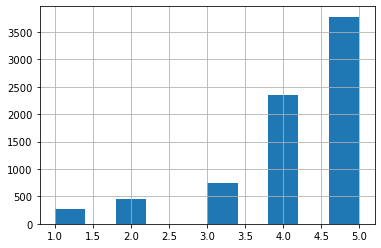

In [133]:
shops['rating'].hist()

There are a looot of 4 and 5 star reviews. The sample is skewed with more positive compared to negative reviews. This could be for a variety of reasons, but for now it just helps to know that there are more positive reviews for further analysis

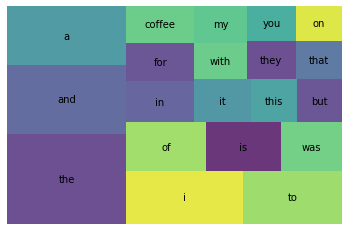

In [263]:
square_viz(count(shops['full_review_text']),20)

In [264]:
# Spacy implimentation:
import spacy 
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_lg')

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [270]:
# Print out tokens for one review
[token.text for token in tokenizer(shops_master['full_review_text'][0])][:10]

[' ',
 '11/25/2016',
 '1',
 'check-in',
 'Love',
 'love',
 'loved',
 'the',
 'atmosphere!',
 'Every']

In [273]:
tokens = []
for doc in tokenizer.pipe(shops_master['full_review_text'],batch_size=500):
    # Generate a list of tokens for every entry in the df
    doc_tokens = [token.text for token in doc]
    # append that list to the tokens list
    tokens.append(doc_tokens)

In [279]:
# this is now a list of lists
tokens[0][:10]

[' ',
 '11/25/2016',
 '1',
 'check-in',
 'Love',
 'love',
 'loved',
 'the',
 'atmosphere!',
 'Every']

In [284]:
#I can stick this list of lists directly into a dataframe
shops['tokens'] = tokens
shops.head()

,coffee_shop_name,full_review_text,rating,tokens
0,The Factory - Cafe With a Soul,"[1, check-in, love, love, loved, the, atmosphe...",5.0,"[ , 11/25/2016, 1, check-in, Love, love, loved..."
1,The Factory - Cafe With a Soul,"[listed, in, date, night:, austin,, ambiance, ...",4.0,"[ , 12/2/2016, Listed, in, Date, Night:, Austi..."
2,The Factory - Cafe With a Soul,"[1, check-in, listed, in, brunch, spots, i, lo...",4.0,"[ , 11/30/2016, 1, check-in, Listed, in, Brunc..."
3,The Factory - Cafe With a Soul,"[very, cool, decor!, good, drinks, nice, seati...",2.0,"[ , 11/25/2016, Very, cool, decor!, Good, drin..."
4,The Factory - Cafe With a Soul,"[1, check-in, they, are, located, within, the,...",4.0,"[ , 12/3/2016, 1, check-in, They, are, located..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [162]:
shops_master['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [164]:
len(good_shops['full_review_text'][0])

97

In [165]:
# Getting total word count from good_shops
good_shops['full_review_text'].apply(lambda x: len(x)).head()

0     97
1     47
2    240
4    116
5    188
Name: full_review_text, dtype: int64

In [166]:
# looking at summary statistics of word count.
good_shops['full_review_text'].apply(lambda x: len(x)).describe()

count    6140.000000
mean       97.514658
std        78.196941
min         4.000000
25%        42.000000
50%        75.000000
75%       130.000000
max       905.000000
Name: full_review_text, dtype: float64

In [171]:
# summary statistics of bad shops:
bad_shops['full_review_text'].apply(lambda x: len(x)).describe()

count    1476.000000
mean      121.463415
std        94.134405
min         7.000000
25%        56.000000
50%        98.000000
75%       157.000000
max       944.000000
Name: full_review_text, dtype: float64

In [173]:
shops.head()

,coffee_shop_name,full_review_text,rating
0,The Factory - Cafe With a Soul,"[1, check-in, love, love, loved, the, atmosphe...",5.0
1,The Factory - Cafe With a Soul,"[listed, in, date, night:, austin,, ambiance, ...",4.0
2,The Factory - Cafe With a Soul,"[1, check-in, listed, in, brunch, spots, i, lo...",4.0
3,The Factory - Cafe With a Soul,"[very, cool, decor!, good, drinks, nice, seati...",2.0
4,The Factory - Cafe With a Soul,"[1, check-in, they, are, located, within, the,...",4.0


In [215]:
# View counts by rating
a = good_shops.groupby(['coffee_shop_name']).count().sort_values(['rating'],ascending=False)
a = a.rename(columns={'rating':'num_reviews'}).drop('full_review_text',1)
a.head()

,num_reviews
coffee_shop_name,
Epoch Coffee,282
Halcyon,219
The Factory - Cafe With a Soul,204
Venezia Italian Gelato,194
Houndstooth Coffee,164


In [216]:
b = good_shops.groupby(['coffee_shop_name']).mean()
b.head()

,rating
coffee_shop_name,
Alta’s Cafe,4.506494
Anderson’s Coffee Company,4.846154
Apanas Coffee & Beer,4.818182
Arturo’s Underground Cafe,4.586207
Bennu Coffee,4.600000


In [259]:
g_rating_visits = pd.merge(a,b,on='coffee_shop_name')
g_rating_visits.head()

,num_reviews,rating
coffee_shop_name,,
Epoch Coffee,282,4.471631
Halcyon,219,4.383562
The Factory - Cafe With a Soul,204,4.764706
Venezia Italian Gelato,194,4.907216
Houndstooth Coffee,164,4.554878


In [260]:
g_rating_visits['num_reviews'].describe().loc['25%']

63.0

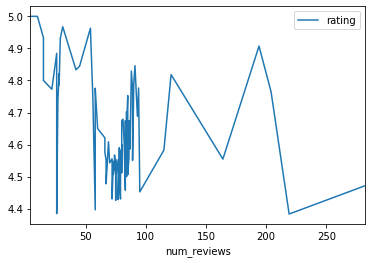

In [225]:
g_rating_visits.plot.line('num_reviews','rating')

In [ ]:
# There is more data in the middle than the edges, lets get the data
# from the middle for the analysis (zoom in on middle 50 % in the graph)

# BUUTT.. its probably better to use the quantile funcitonality.

def get_hump(fun_df, column):
    """ Function to return the "hump" of the distribution of a 
    pandas series. This function returns a pandas series with 
    data from the 25% to the 75%  This function only works for 
    numerical data
    
    todo:
    build in percentiles functionality:
    percentiles = [25,75]
    """
    pd_series = fun_df[column]
    low = pd_series.describe().loc['25%']
    high = pd_series.describe().loc['75%']
    return fun_df[(fun_df[column]>low) & (fun_df[column]<high)]

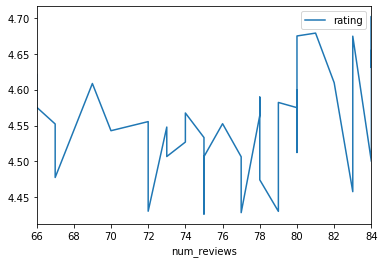

In [262]:
get_hump(g_rating_visits,'num_reviews').plot.line('num_reviews','rating')

It doesn't seem like there is a strong correlation between the number of words and the rating of the review for the 4 and 5 star results.

In [ ]:
get_hump(g_rating_visits,'num_reviews').plot.line('num_reviews','rating')

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

